<a href="https://colab.research.google.com/github/Edrasen/Advanced_Neuronal_Networks/blob/main/Tarea_red_vanilla_FMNIST_TF2_(EARM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea 1_ Red neuronal Perceptrón multicapa  

En esta primera tarea es necesario que realicen  un clasificador de prendas de ropa  para esto será necesario usar el  conjunto de entrenamiento Fashion Mnist

Este conjunto está conformado por fotografías de 10 diferentes estilos de ropa en imagenes de 28X28 

El clasificador debe de ser capaz de separar adecuadamente las diferentes imágenes.  Con este tipo de red se tiene una expectativa de un 97%  de exactitud.

    - Realizar la red neuronal programada completamente con TensorFlow
    - Realizar la misma arquitectura con Keras  

Adjunto encontrarán el código que ya tiene incorporada la lectura del conjunto de datos


In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [3]:
from tensorflow.keras.datasets.fashion_mnist import load_data
fashion_mnist = load_data()
#read_data_sets("exercice/data", one_hot = True)

## Separando el conjunto de datos en Entrenamiento y prueba 

In [4]:
(x_train, y_train), (x_test, y_test)=fashion_mnist

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
imagendemo=x_train[1,:,:]

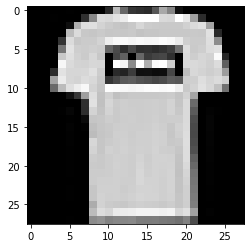

In [7]:
plt.imshow(imagendemo,cmap='gray')

In [8]:
y_train[3]

3

Las etiquetas numéricas pueden ser transformadas al nombre de la clase correspondiente usando el siguiente diccionario 

In [9]:
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

In [10]:
y_train[5]

2

# Preparando los datos para el entrenamiento

In [11]:
x_train = x_train.reshape(60000,784).astype('float32')
x_test = x_test.reshape(10000,784).astype('float32')

In [12]:
print(x_train.shape)
x_train

(60000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
print(x_test.shape)
x_test

(10000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
#y_train = to_categorical(y_train, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)

In [15]:
# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

In [16]:
y_train_onehot[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
y_test_onehot[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

# Declarando la arquitectura

In [18]:
class DNN_model(object):
  def __init__(self,
               n_nodes_hl1=1200,
               n_nodes_hl2=1200,
               n_nodes_hl3=1200,
               n_classes=10):
    self.h1LW = tf.Variable(np.random.rand(784, n_nodes_hl1),name="hl1weigths",dtype="float32")
    self.h1LB = tf.Variable(np.random.rand(n_nodes_hl1),name="hl1bias",dtype="float32")

    self.h2LW = tf.Variable(np.random.rand(n_nodes_hl1, n_nodes_hl2),name="hl2weigths",dtype="float32")
    self.h2LB = tf.Variable(np.random.rand(n_nodes_hl2),name="hl2bias",dtype="float32")

    self.h3LW = tf.Variable(np.random.rand(n_nodes_hl2, n_nodes_hl3),name="hl3weigths",dtype="float32")
    self.h3LB = tf.Variable(np.random.rand(n_nodes_hl3),name="hl3bias",dtype="float32")

    self.outW = tf.Variable(np.random.rand(n_nodes_hl3, n_classes),name="outweigths",dtype="float32")
    self.outB = tf.Variable(np.random.rand(n_classes),name="outbias",dtype="float32")
    
    self.trainable_variables =[self.h1LW,self.h1LB,self.h2LW,self.h2LB,self.h3LW,self.h3LB,self.outW,self.outB]          
  def __call__(self,x): 
      # Declarando la arquitectura

      l1 = tf.add(tf.matmul(x,self.h1LW), self.h1LB)
      l1 = tf.nn.relu(l1)

      l2 = tf.add(tf.matmul(l1,self.h2LW), self.h2LB)
      l2 = tf.nn.relu(l2)

      l3 = tf.add(tf.matmul(l2,self.h3LW), self.h3LB)
      l3 = tf.nn.relu(l3)

      output = tf.matmul(l3,self.outW) + self.outB
      return output

In [19]:
DNN = DNN_model()
DNN(x_train)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[8.1952055e+12, 8.3029247e+12, 8.4663148e+12, ..., 8.1959961e+12,
        8.2801134e+12, 8.2844320e+12],
       [9.1054292e+12, 9.2251147e+12, 9.4066516e+12, ..., 9.1063079e+12,
        9.1997696e+12, 9.2045679e+12],
       [3.0848414e+12, 3.1253903e+12, 3.1868925e+12, ..., 3.0851389e+12,
        3.1168036e+12, 3.1184283e+12],
       ...,
       [6.7229885e+12, 6.8113578e+12, 6.9453957e+12, ..., 6.7236392e+12,
        6.7926449e+12, 6.7961860e+12],
       [3.6070949e+12, 3.6545068e+12, 3.7264236e+12, ..., 3.6074428e+12,
        3.6444672e+12, 3.6463683e+12],
       [1.7917457e+12, 1.8152978e+12, 1.8510191e+12, ..., 1.7919191e+12,
        1.8103092e+12, 1.8112541e+12]], dtype=float32)>

Select an optimizer

In [20]:
optimizador = tf.keras.optimizers.Adam(learning_rate=0.001)
#optimizador = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

In [21]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

In [22]:
#@tf.function
def train_step(model,tdata,labels):
  with tf.GradientTape() as tape:
    predictions = model(tdata)
    #error function
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))

  gradients = tape.gradient(loss, model.trainable_variables)
  capped_grads_and_vars = [(grad, model.trainable_variables[index]) for index, grad in enumerate(gradients)]
  optimizador.apply_gradients(capped_grads_and_vars)
  train_loss(loss)
  train_accuracy(labels, predictions)

In [23]:
#@tf.function
def test_step(model, tdata, labels):
  predictions = model(tdata)
  t_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [24]:
def next_bach(s,e):
  return x_train[s:e], y_train[s:e]

# Training and testing function

In [25]:
def fitting(model, train_x, train_y, test_x, test_y, EPOCHS, N_batch, batch_size):
  for epoch in range(EPOCHS):
    i = 0
    while i+batch_size < len(train_x) or i+batch_size < batch_size*N_batch:
      start = i
      end = i + batch_size
      batch_x, batch_y = train_x[start:end], train_y[start:end]
      train_step(model, batch_x, batch_y)
      i+=batch_size
    
    test_step(model, test_x, test_y)

    template = 'Epoch {}, Perdida: {}, Exactitud: {}, Perdida de prueba: {}, Exactitud de prueba: {}'
    print(template.format(epoch+1,
                         train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

In [26]:
fitting(DNN, x_train, y_train_onehot, x_test, y_test_onehot, 10, 600, 100)

Epoch 1, Perdida: 8052542976.0, Exactitud: 10.115192413330078, Perdida de prueba: 2348714496.0, Exactitud de prueba: 10.0
Epoch 2, Perdida: 1654398336.0, Exactitud: 10.35726261138916, Perdida de prueba: 389747040.0, Exactitud de prueba: 10.0
Epoch 3, Perdida: 185629648.0, Exactitud: 19.65776252746582, Perdida de prueba: 8584520.0, Exactitud de prueba: 44.93000030517578
Epoch 4, Perdida: 6249824.0, Exactitud: 49.55592727661133, Perdida de prueba: 5346227.0, Exactitud de prueba: 61.04999923706055
Epoch 5, Perdida: 2437557.75, Exactitud: 63.39733123779297, Perdida de prueba: 1895720.5, Exactitud de prueba: 66.8499984741211
Epoch 6, Perdida: 1396047.0, Exactitud: 67.61268615722656, Perdida de prueba: 1707023.625, Exactitud de prueba: 63.27000427246094
Epoch 7, Perdida: 840776.0625, Exactitud: 71.65776824951172, Perdida de prueba: 911242.25, Exactitud de prueba: 71.56999969482422
Epoch 8, Perdida: 426357.40625, Exactitud: 75.96160125732422, Perdida de prueba: 381973.0, Exactitud de prueba: 